**Machine leaning project 1**

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv(r"C:\Users\abdul\OneDrive\Desktop\6910 Python ML\Projects\Project 2\survey.csv")
df1.shape

(1259, 27)

In [3]:
df1.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [4]:
##deleting columns that has signific
del df1['state']
del df1['comments']
del df1['Timestamp']

In [5]:
df1.isna().sum()
df1.isnull().sum().max() 

264

In [6]:
df1.shape

(1259, 24)

In [7]:
df1=df1[df1['self_employed'].notnull()]

In [8]:
print(df1.shape)
print(df1.describe())
print(df1.info())

(1241, 24)
                Age
count  1.241000e+03
mean   8.058021e+07
std    2.838665e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 18 to 1258
Data columns (total 24 columns):
Age                          1241 non-null int64
Gender                       1241 non-null object
Country                      1241 non-null object
self_employed                1241 non-null object
family_history               1241 non-null object
treatment                    1241 non-null object
work_interfere               977 non-null object
no_employees                 1241 non-null object
remote_work                  1241 non-null object
tech_company                 1241 non-null object
benefits                     1241 non-null object
care_options                 1241 non-null object
wellness_program             1241 non-null object
seek_help                    1241 non-null object
ano

In [9]:
df1['Gender'].str.lower()
df1['Gender'].unique()
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
transgender = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for i,r in df1.iterrows():
    if str.lower(r.Gender) in male:
        df1['Gender'].replace(to_replace=r.Gender, value='male', inplace=True)
    if str.lower(r.Gender )in female:
        df1['Gender'].replace(to_replace=r.Gender, value='female', inplace=True)
    if str.lower(r.Gender )in transgender:
        df1['Gender'].replace(to_replace=r.Gender, value='transgender', inplace=True)
        misc=['A little about you', 'p']

df1=df1[~df1['Gender'].isin(misc)]


In [10]:
#complete missing age with mean
df1['Age'].fillna(df1['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df1['Age'])
s[s<18] = df1['Age'].median()
df1['Age'] = s
s = pd.Series(df1['Age'])
s[s>120] = df1['Age'].median()
df1['Age'] = s

In [11]:
df1['remote_work'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
## Replace the age values less than 18 and more than 72 with the median
df1.loc[df1['Age']>72,'Age']=df1['Age'].median()
df1.loc[df1['Age']<18,'Age']=df1['Age'].median()

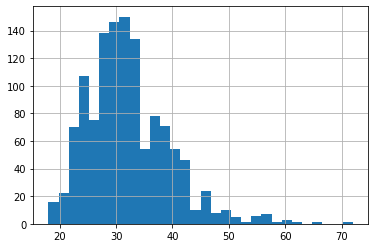

In [13]:
df1['Age'].hist(bins=30)


In [14]:
df1.groupby(df1['tech_company'])['tech_company'].count()

tech_company
No      226
Yes    1013
Name: tech_company, dtype: int64

In [15]:
#replacing the nan of self_employed with the value of the NO because most of the people are unemployed
df1['self_employed'].fillna('No',inplace=True)

In [16]:
df1['work_interfere'].groupby(df1['work_interfere']).count()

work_interfere
Never        207
Often        140
Rarely       170
Sometimes    458
Name: work_interfere, dtype: int64

In [17]:
###filling NAN with don't know
df1['work_interfere'].fillna('Dont know', inplace=True)

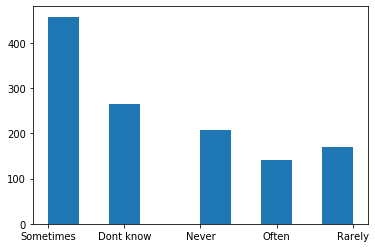

In [18]:
df1['work_interfere'].hist(grid=False)
plt.show()

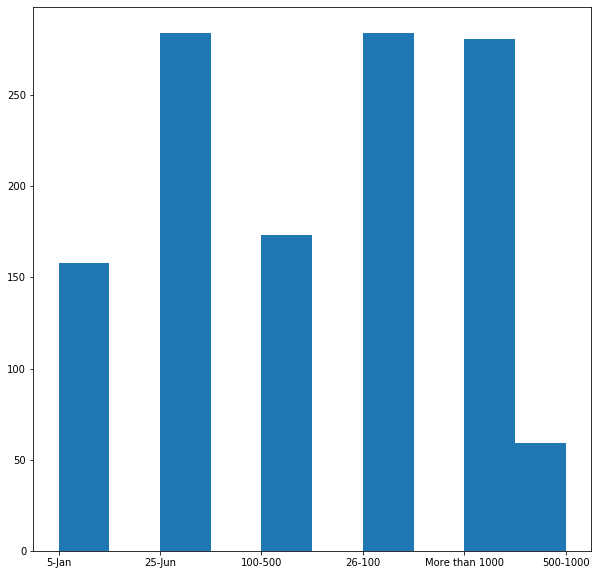

In [19]:
df1['no_employees'].hist(grid=False, figsize=(10,10))

In [20]:
df1['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [21]:
df1['mental_health_consequence'].groupby(df1['mental_health_consequence']).count()
df1=df1[df1['mental_health_consequence']!='Maybe']

df1.shape

(767, 24)

In [22]:
##scalling the age column##
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['Age'] = scaler.fit_transform(df1[['Age']])
df1.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,0.651163,male,United States,Yes,Yes,No,Sometimes,5-Jan,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,0.418605,male,France,Yes,Yes,No,Dont know,25-Jun,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
21,0.302326,male,United States,Yes,No,No,Never,5-Jan,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
24,0.348837,male,United States,No,Yes,Yes,Rarely,26-100,No,Yes,...,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No
25,0.395349,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,No,...,No,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No


In [26]:
features=['Age','Gender','self_employed','family_history','benefits','remote_work']

from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df1['remote_work']=labelencoder_X.fit_transform(df1['remote_work'])
df1['tech_company']=labelencoder_X.fit_transform(df1['tech_company'])
df1['self_employed']=labelencoder_X.fit_transform(df1['self_employed'])
df1['family_history']=labelencoder_X.fit_transform(df1['family_history'])
df1['benefits']=labelencoder_X.fit_transform(df1['benefits'])
df1['Gender']=labelencoder_X.fit_transform(df1['Gender'])
df1['mental_health_consequence']=labelencoder_X.fit_transform(df1['mental_health_consequence'])
X=df1[features]
y=df1['mental_health_consequence']

X



,Age,Gender,self_employed,family_history,benefits,remote_work
18,0.651163,1,1,1,2,1
19,0.418605,1,1,1,1,1
21,0.302326,1,1,0,1,1
24,0.348837,1,0,1,2,0
25,0.395349,1,0,1,2,0
...,...,...,...,...,...,...
1252,0.255814,1,0,1,2,1
1254,0.186047,1,0,0,1,0
1255,0.325581,1,0,1,2,1
1256,0.372093,1,0,1,2,0


In [40]:
X['benefits'] = scaler.fit_transform(X[['benefits']])
X.head()

C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Gender,self_employed,family_history,benefits,remote_work
18,0.651163,1,1,1,1.0,1
19,0.418605,1,1,1,0.5,1
21,0.302326,1,1,0,0.5,1
24,0.348837,1,0,1,1.0,0
25,0.395349,1,0,1,1.0,0


In [41]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(X.Age,axis=1)
#X=scaler.transform(X)
#df_feat=pd.DataFrame(X,columns=(features))

In [42]:
##splitting the dataset into testing and training set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=0)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=175,p=2,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test, y_pred))

[[134   1]
 [ 55   2]]
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       135
           1       0.67      0.04      0.07        57

    accuracy                           0.71       192
   macro avg       0.69      0.51      0.45       192
weighted avg       0.70      0.71      0.60       192

0.7083333333333334


Text(0, 0.5, 'Error_rate')

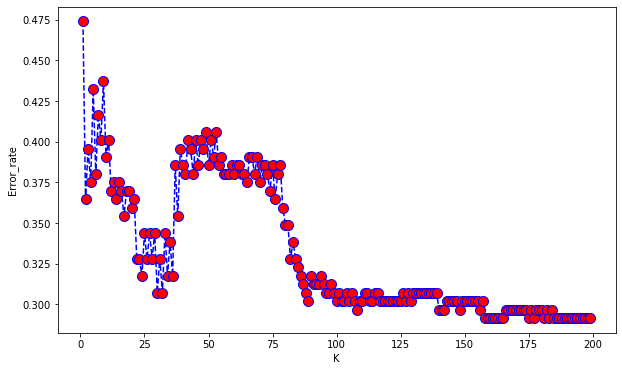

In [44]:
error_rate=[]
for i in range(1,200):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
##plotting the error rate##
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error_rate')

In [45]:
y=df1['mental_health_consequence']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20, random_state=0)

In [63]:
###decision tree ML ##

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='gini',splitter='random' ,max_depth=4)
DTC.fit(X_train,y_train)
DTC_pred=DTC.predict(X_test)

print(confusion_matrix(y_test,DTC_pred))
print(classification_report(y_test,DTC_pred))
print(metrics.accuracy_score(y_test,DTC_pred))



##Error calculation##
DecTree = round(DTC.score(X_test, y_test), 2)
mae_DT = metrics.mean_absolute_error(y_test, DTC_pred) 
mse_DT = metrics.mean_squared_error(y_test, DTC_pred) 

RFC = round(rfc.score(X_test, y_test), 2)
mae_rfc = metrics.mean_absolute_error(y_test, rfc_pred) 
mse_rfc = metrics.mean_squared_error(y_test, rfc_pred) 



report = classification_report(y_test, DTC_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

[[108   5]
 [ 34   7]]
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       113
           1       0.58      0.17      0.26        41

    accuracy                           0.75       154
   macro avg       0.67      0.56      0.56       154
weighted avg       0.71      0.75      0.69       154

0.7467532467532467


,precision,recall,f1-score,support
0,0.760563,0.955752,0.847059,113.000000
1,0.583333,0.170732,0.264151,41.000000
accuracy,0.746753,0.746753,0.746753,0.746753
macro avg,0.671948,0.563242,0.555605,154.000000
weighted avg,0.713379,0.746753,0.691869,154.000000


In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth = 4, min_samples_leaf=8, min_samples_split=7, n_estimators = 50, random_state = 1)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print(metrics.accuracy_score(y_test, rfc_pred))

[[102  11]
 [ 30  11]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       113
           1       0.50      0.27      0.35        41

    accuracy                           0.73       154
   macro avg       0.64      0.59      0.59       154
weighted avg       0.70      0.73      0.70       154

0.7337662337662337


In [65]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
pred_SVC=model.predict(X_test)

C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [66]:

print(confusion_matrix(y_test,pred_SVC))
print(classification_report(y_test,pred_SVC))
print(metrics.accuracy_score(y_test, pred_SVC))

[[113   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       113
           1       0.00      0.00      0.00        41

    accuracy                           0.73       154
   macro avg       0.37      0.50      0.42       154
weighted avg       0.54      0.73      0.62       154

0.7337662337662337


C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
from sklearn.model_selection import GridSearchCV
L=[10,20,100,1000]
param_grid={'C':L,'gamma':[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

C:\Users\abdul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.639, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.652, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.618, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.595, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.608, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.603, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ...........

[CV] ................ C=1000, gamma=0.0001, score=0.595, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.598, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.598, total=   0.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.8s finished


{'C': 10, 'gamma': 1}

In [68]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [69]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print(metrics.accuracy_score(y_test, grid_predictions))
SVM= round(grid.score(X_test, y_test), 2)
mae_SVM = metrics.mean_absolute_error(y_test, grid_predictions) 
mse_SVM = metrics.mean_squared_error(y_test, grid_predictions) 

compare_models = pd.DataFrame( 
    {  'Model' : ['DecTree','RFC','SVC'], 
      'Score' : [DecTree,RFC,SVM], 
        'MAE'  : [mae_DT,mae_rfc,mae_SVM], 
       'MSE'  : [mse_DT,mse_rfc,mse_SVM] 
    }) 
  
print(compare_models) 




[[87 26]
 [29 12]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       113
           1       0.32      0.29      0.30        41

    accuracy                           0.64       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.63      0.64      0.64       154

0.6428571428571429
     Model  Score       MAE       MSE
0  DecTree   0.75  0.253247  0.253247
1      RFC   0.73  0.266234  0.266234
2      SVC   0.64  0.357143  0.357143


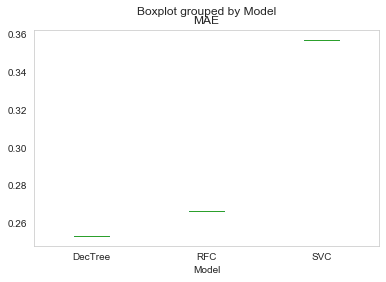

In [70]:
compare_models.boxplot(by ='Model', column =['MAE'], grid =False)


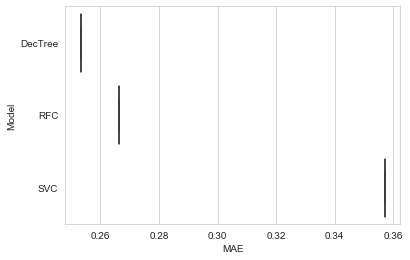

In [71]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'MAE', y = 'Model', data = compare_models) 

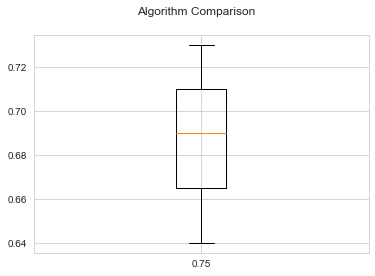

In [72]:
result=[0.69,0.73,0.64]
names=[DecTree,RFC,SVC]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()